## Age B

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [15]:
from scipy.io import loadmat
from datetime import datetime

Dataset from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/
@article{Rothe-IJCV-2016,
  author = {Rasmus Rothe and Radu Timofte and Luc Van Gool},
  title = {Deep expectation of real and apparent age from a single image without facial landmarks},
  journal = {International Journal of Computer Vision (IJCV)},
  year = {2016},
  month = {July},
}

Age extraction code based on https://github.com/yu4u/age-gender-estimation

In [5]:
path = Path('data/ages/wiki_crop')

In [6]:
def calc_age(taken, dob):
    birth = datetime.fromordinal(max(int(dob) - 366, 1))

    # assume the photo was taken in the middle of the year
    if birth.month < 7:
        return taken - birth.year
    else:
        return taken - birth.year - 1

In [7]:
mat_path = path/'wiki.mat'

In [8]:
meta = loadmat(mat_path)

In [9]:
meta

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, 705061, ..., 711338, 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, 1961, ..., 1970, 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
         array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
         array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'),
         array(['65/10001965_1930-05-23_1961.jpg'], dtype='<U31'), ...,
         array(['32/9997032_1947-07-30_1970.jpg'], dtype='<U30'),
         array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
         array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
         array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]], dtype=object), array([[1., 1., 1., 1., ..., 1., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'), array(['Dettmar Cramer']

In [10]:
dob = meta['wiki'][0, 0]["dob"][0]  # Matlab serial date number

In [21]:
dob

array([723671, 703186, 711677, 705061, ..., 711338, 720620, 723893, 713846], dtype=int32)

In [13]:
photo_taken = meta['wiki'][0, 0]["photo_taken"][0]  # year

In [92]:
age = [calc_age(photo_taken[i], dob[i]) for i in range(len(dob))]

In [93]:
len(age)

62328

In [31]:
pic_path = meta['wiki'][0, 0]["full_path"][0]

In [32]:
pic_path

array([array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
       array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
       array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'),
       array(['65/10001965_1930-05-23_1961.jpg'], dtype='<U31'), ...,
       array(['32/9997032_1947-07-30_1970.jpg'], dtype='<U30'),
       array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
       array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'), array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')],
      dtype=object)

In [35]:
type(pic_path[0])

numpy.ndarray

In [132]:
tester = 24

In [133]:
test_path = str(pic_path[tester][0]); age[tester]

28

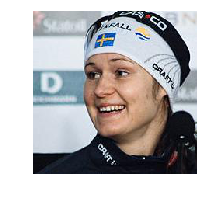

In [134]:
fname = path/test_path
img = open_image(fname)
img.show()

In [135]:
img.size

torch.Size([211, 211])